# Name: Tufan Kundu
# Reg No. : 24MDT0184

##  February EDA Lab

## Time Series analysis on Weather Data

## Importing the necessary libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [4]:
df = pd.read_csv("Weather Data.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


## Checking for the missing values

In [6]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

`Inference:`
- No missing values present in the dataset


## Checking for duplicates

In [7]:
df.duplicated().sum()

0

`Inference:`
- No duplicate values present in the dataset


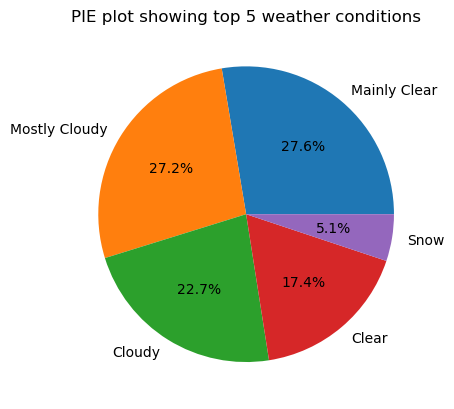

In [8]:
df['Weather'].value_counts().nlargest(5).plot(kind = 'pie',autopct='%1.1f%%')
plt.title("PIE plot showing top 5 weather conditions")
plt.ylabel("")
plt.show()

`Inference`:
- The weather is mostly either clear or cloudy followed by 5% snowy weather

C:\Users\TUFAN\AppData\Local\Temp\ipykernel_6572\2648648754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = k,palette='viridis')


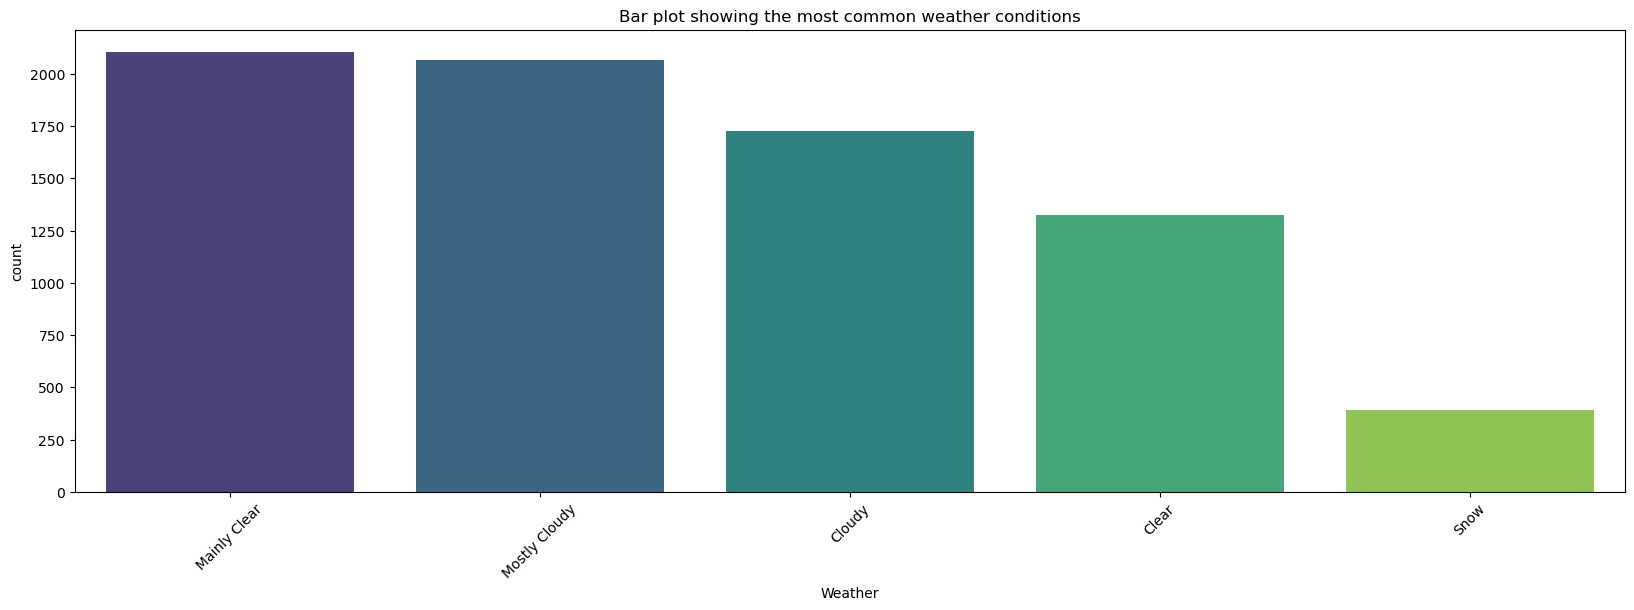

In [9]:
plt.figure(figsize=(20,6))
k = df['Weather'].value_counts().nlargest(5)
sns.barplot(data = k,palette='viridis')
plt.xticks(rotation = 45)
plt.title("Bar plot showing the most common weather conditions")
plt.show()


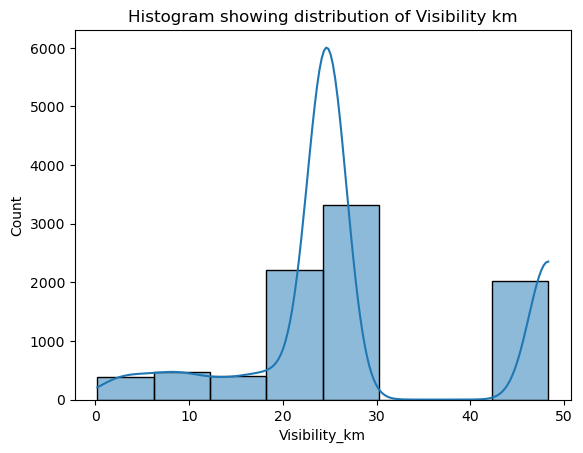

In [10]:
sns.histplot(df['Visibility_km'],kde=True,bins=8)
plt.title("Histogram showing distribution of Visibility km")
plt.show()

`Inference:`
- Most visible range is between 20-30 km

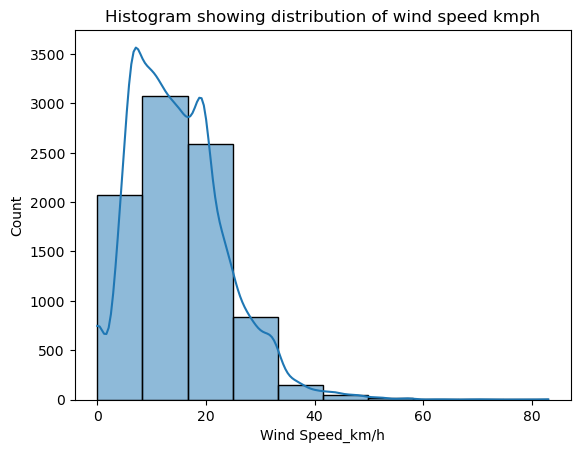

In [11]:
sns.histplot(df['Wind Speed_km/h'],kde=True,bins=10)
plt.title("Histogram showing distribution of wind speed kmph")
plt.show()

`Inference:`
- Mostly windspeed is around 8-20 kmph

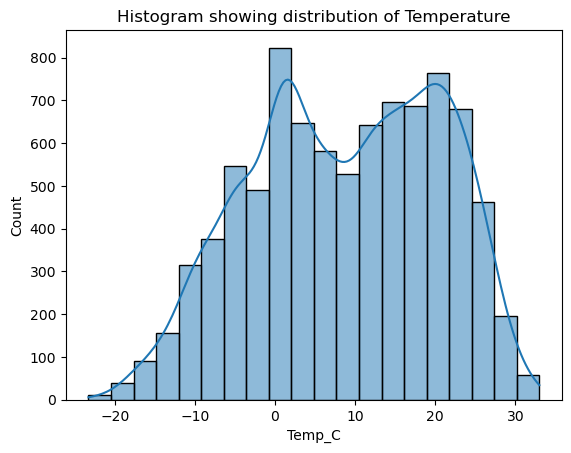

In [12]:
sns.histplot(df['Temp_C'],kde=True,bins=20)
plt.title("Histogram showing distribution of Temperature")
plt.show()

`Inference:`
- the temperature is mostly in the cooler side, -1 to 2 degree Celcius 

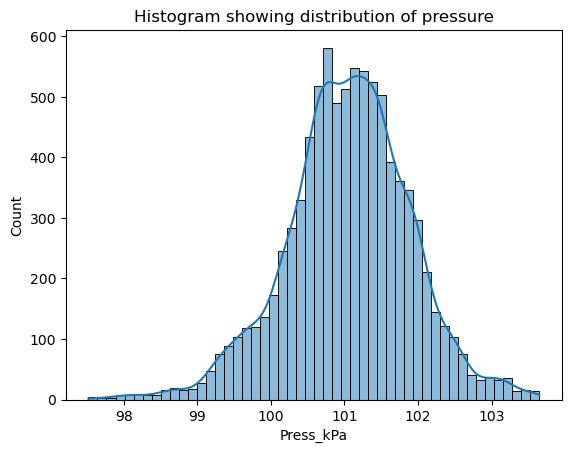

In [13]:
sns.histplot(df['Press_kPa'],kde=True,bins=50)
plt.title("Histogram showing distribution of pressure")
plt.show()

`Inference:`
- Average pressure ranges between 100-102 K pascal

In [14]:
df.corr(numeric_only='True')

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


<Axes: >

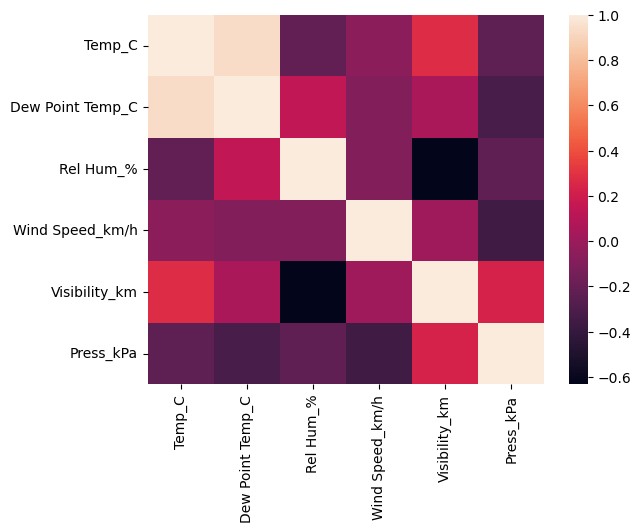

In [69]:
sns.heatmap(df.corr(numeric_only='True'))


`Inference:`
- Dew Point and temperature has a very high positive correlation 
- relative humidity and visibility has very high negative correlation

In [15]:
top_2_weather = df['Weather'].value_counts().nlargest(2).index
df_filtered = df[df['Weather'].isin(top_2_weather)]
df_filtered

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy
29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8757,12/30/2012 21:00,-13.8,-16.5,80,20,25.0,101.50,Mainly Clear
8758,12/30/2012 22:00,-13.7,-16.3,81,19,25.0,101.54,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


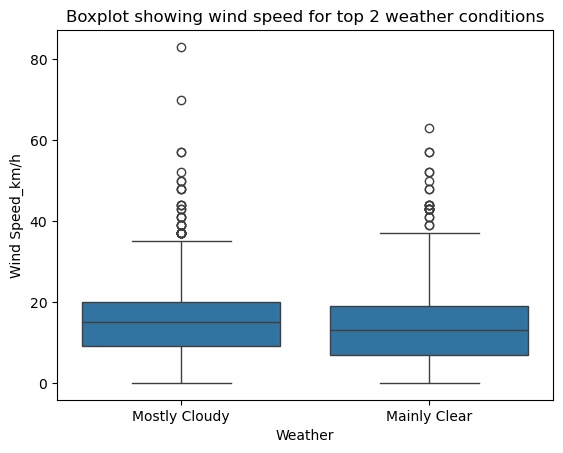

In [17]:
sns.boxplot(x='Weather', y = 'Wind Speed_km/h', data = df_filtered)
plt.title("Boxplot showing wind speed for top 2 weather conditions")
plt.show()

## `Inference:`
- average windspeed ins around 10-20 kmph with some outliers in both the weather

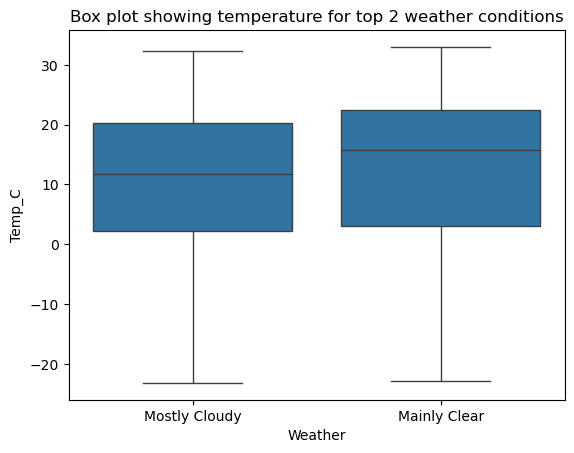

In [18]:
sns.boxplot(x='Weather', y = 'Temp_C', data = df_filtered)
plt.title("Box plot showing temperature for top 2 weather conditions")
plt.show()

## `Inference:`
This box plot shows average weather in both the weather condition ranges between 1 to 20 degrees celsius

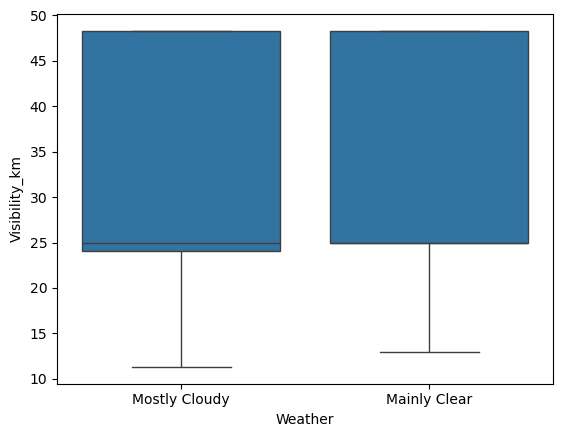

In [88]:
sns.boxplot(x='Weather', y = 'Visibility_km', data = df_filtered)
plt.show()

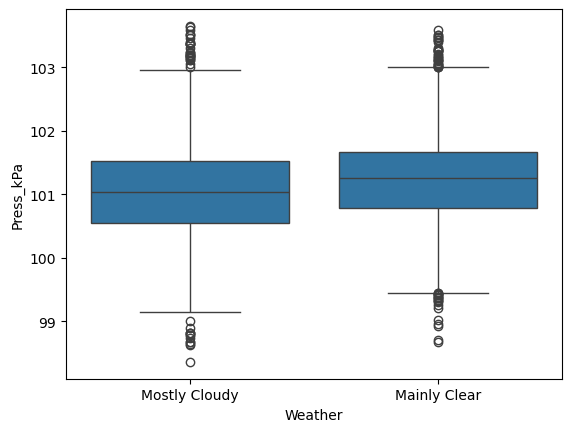

In [90]:
sns.boxplot(x='Weather', y = 'Press_kPa', data = df_filtered)
plt.show()

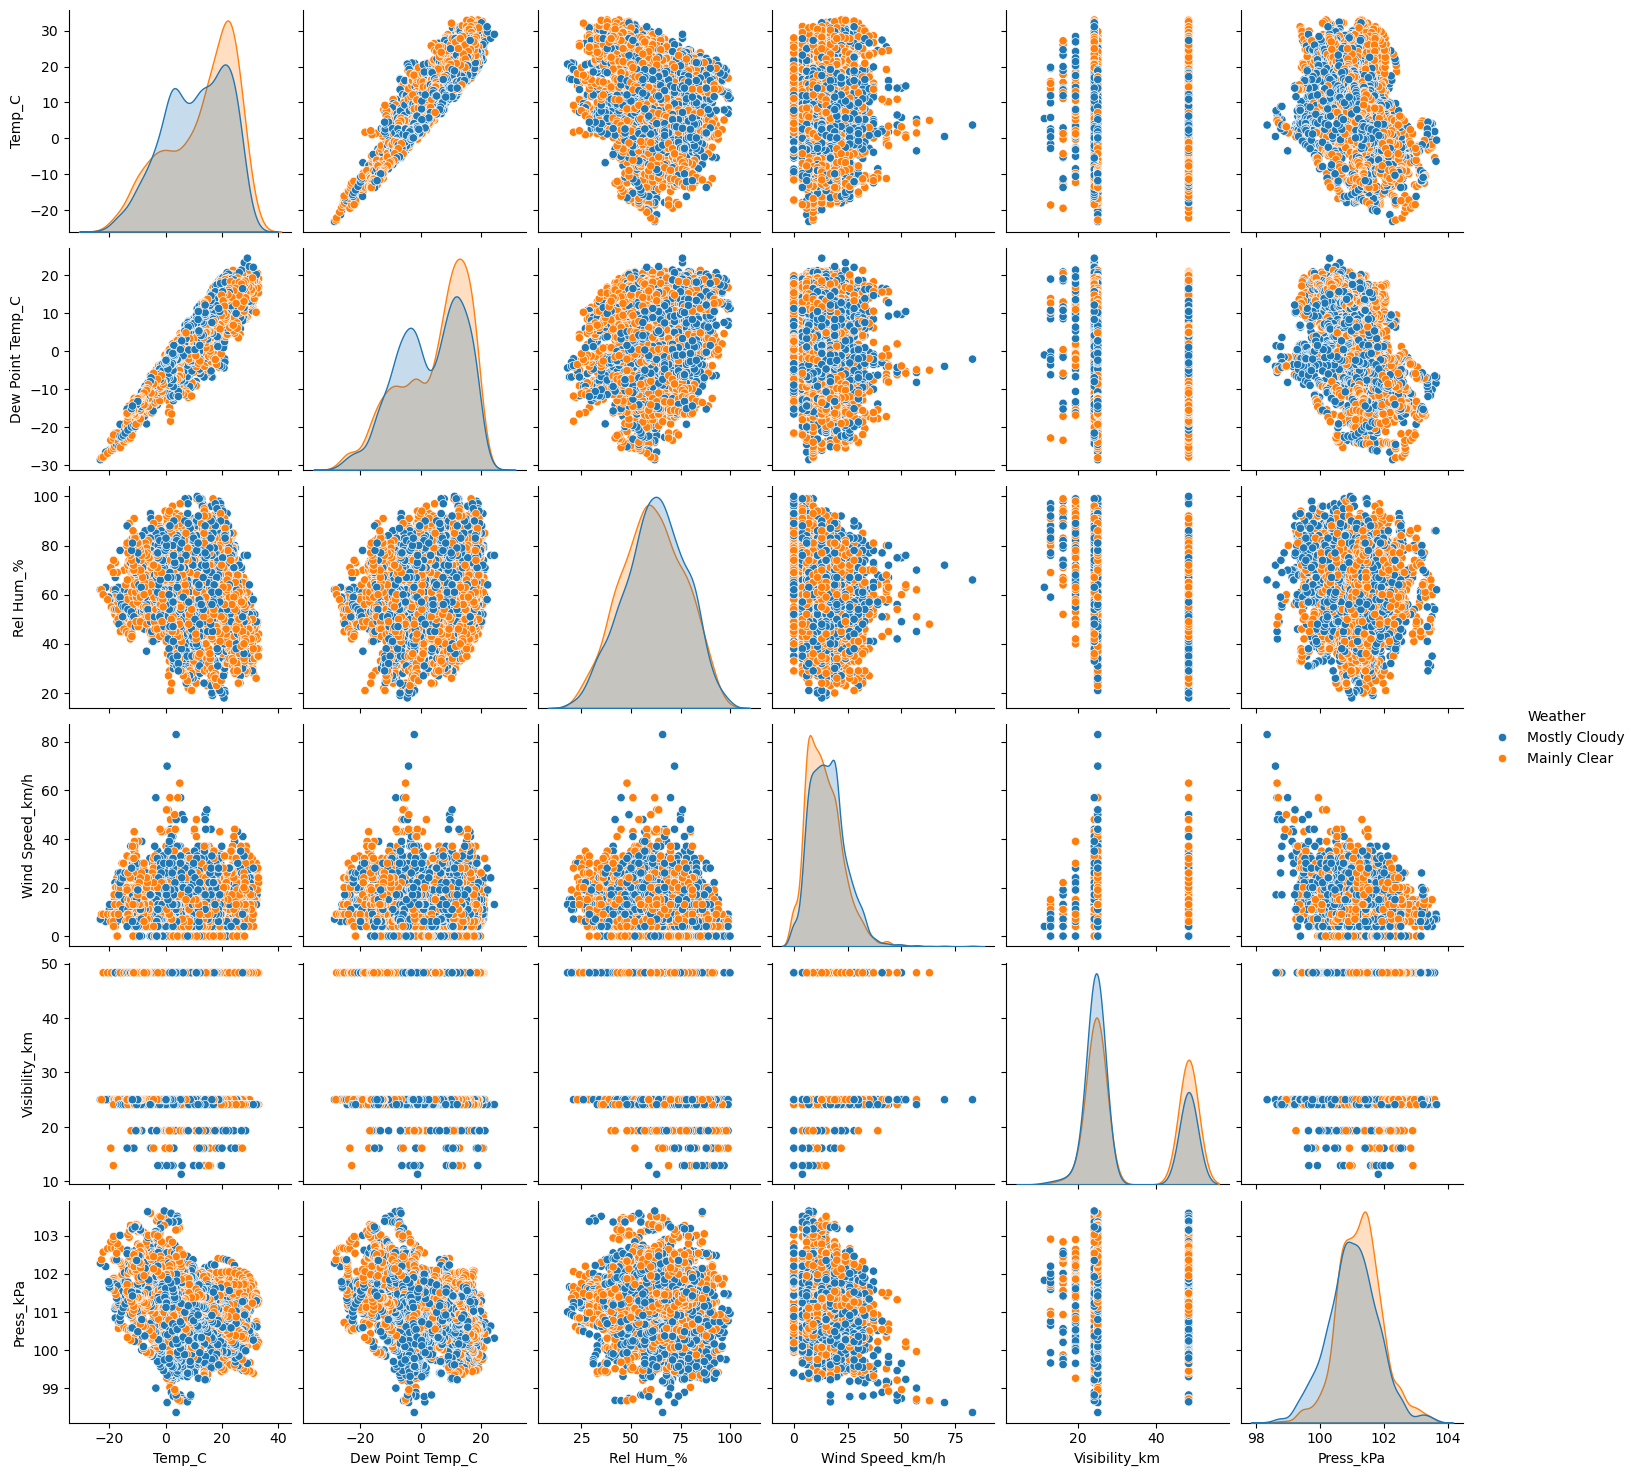

In [93]:
sns.pairplot(df_filtered,hue = 'Weather')
plt.show()

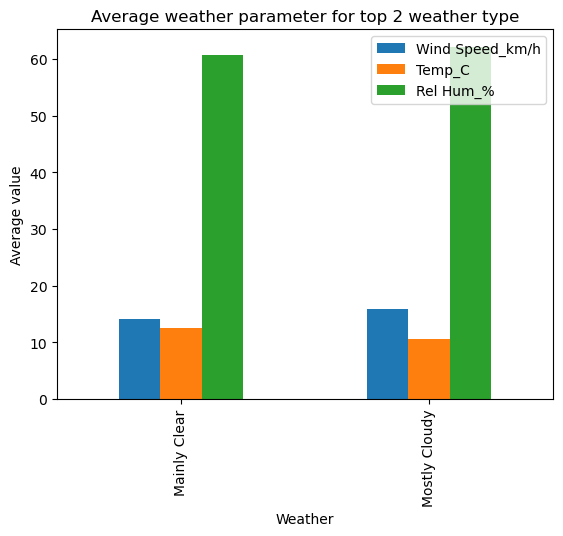

In [94]:
df_grouped = df_filtered.groupby('Weather')[['Wind Speed_km/h','Temp_C','Rel Hum_%']].mean()
df_grouped.plot(kind = 'bar')
plt.title("Average weather parameter for top 2 weather type")
plt.ylabel("Average value")
plt.show()

## `Inference:`
- on a cloudy day the temperature is lesser and the wind speed is more

### Grouping by Weather Condition & Computing Summary Statistics

In [19]:
df.groupby('Weather')[['Temp_C', 'Wind Speed_km/h', 'Rel Hum_%', 'Press_kPa']].agg(['mean', 'median', 'std'])

Temp_C                    \
                                              mean median        std   
Weather                                                                
Clear                                     6.825716   7.50  12.132015   
Cloudy                                    7.970544   7.35  11.000283   
Drizzle                                   7.353659   5.40   5.297126   
Drizzle,Fog                               8.067500   9.15   4.970286   
Drizzle,Ice Pellets,Fog                   0.400000   0.40        NaN   
Drizzle,Snow                              1.050000   1.05   0.212132   
Drizzle,Snow,Fog                          0.693333   0.60   0.317280   
Fog                                       4.303333   2.65   8.038802   
Freezing Drizzle                         -5.657143  -5.50   2.024728   
Freezing Drizzle,Fog                     -2.533333  -1.85   2.122891   
Freezing Drizzle,Haze                    -5.433333  -5.50   0.404145   
Freezing Drizzle,Snow                    -5.109091  -4.40   1.705552   
Freezing Fog                             -7.575000  -5.60   9.214255   
Freezing Rain                            -3.885714  -4.80   2.112183   
Freezing Rain,Fog                        -2.225000  -1.45   2.772935   
Freezing Rain,Haze                       -4.900000  -4.90   0.000000   
Freezing Rain,Ice Pellets,Fog            -2.600000  -2.60        NaN   
Freezing Rain,Snow Grains                -5.000000  -5.00        NaN   
Haze                                     -0.200000  -0.25   6.292535   
Mainly Clear                             12.558927  15.80  12.348807   
Moderate Rain,Fog                         1.700000   1.70        NaN   
Moderate Snow                            -5.525000  -5.45   0.613052   
Moderate Snow,Blowing Snow               -5.450000  -5.45   0.070711   
Mostly Cloudy                            10.574287  11.80  11.312839   
Rain                                      9.786275   8.90   6.404164   
Rain Showers                             13.722340  14.95   6.977575   
Rain Showers,Fog                         12.800000  12.80        NaN   
Rain Showers,Snow Showers                 2.150000   2.15   0.070711   
Rain,Fog                                  8.273276   7.90   6.037209   
Rain,Haze                                 4.633333   4.40   0.776745   
Rain,Ice Pellets                          0.600000   0.60        NaN   
Rain,Snow                                 1.055556   1.05   0.279121   
Rain,Snow Grains                          1.900000   1.90        NaN   
Rain,Snow,Fog                             0.800000   0.80        NaN   
Rain,Snow,Ice Pellets                     1.100000   1.10   0.163299   
Snow                                     -4.524103  -4.80   4.155435   
Snow Pellets                              0.700000   0.70        NaN   
Snow Showers                             -3.506667  -3.70   4.322776   
Snow Showers,Fog                        -10.675000 -10.70   0.556028   
Snow,Blowing Snow                        -5.410526  -5.00   2.854995   
Snow,Fog                                 -5.075676  -7.40   4.668714   
Snow,Haze                                -4.020000  -4.00   0.294958   
Snow,Ice Pellets                         -1.883333  -2.55   2.017341   
Thunderstorms                            24.150000  24.15   3.606245   
Thunderstorms,Heavy Rain Showers         10.900000  10.90        NaN   
Thunderstorms,Moderate Rain Showers,Fog  19.600000  19.60        NaN   
Thunderstorms,Rain                       20.433333  20.60   0.960902   
Thunderstorms,Rain Showers               20.037500  20.85   4.203947   
Thunderstorms,Rain Showers,Fog           21.600000  22.40   1.835756   
Thunderstorms,Rain,Fog                   20.600000  20.60        NaN   

                                        Wind Speed_km/h                    \
                                                   mean median        std   
Weather                                                                  

## Converting Date/Time column to DateTime format

In [21]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [22]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [35]:
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Weekday'] = df['Date/Time'].dt.day_name()
df['Hour'] = df['Date/Time'].dt.hour
df['Minute'] = df['Date/Time'].dt.minute
df['Second'] = df['Date/Time'].dt.second

df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Year,Month,Day,Hour,Minute,Second,Temp_MA7,Humidity_MA7,Weekday
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012,1,1,0,0,0,NaN,NaN,Sunday
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012,1,1,1,0,0,NaN,NaN,Sunday
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012,1,1,2,0,0,NaN,NaN,Sunday
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012,1,1,3,0,0,NaN,NaN,Sunday
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012,1,1,4,0,0,NaN,NaN,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,2012,12,31,19,0,0,-2.000000,84.285714,Monday
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,2012,12,31,20,0,0,-1.314286,83.857143,Monday
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,2012,12,31,21,0,0,-0.900000,85.142857,Monday
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,2012,12,31,22,0,0,-0.600000,85.857143,Monday


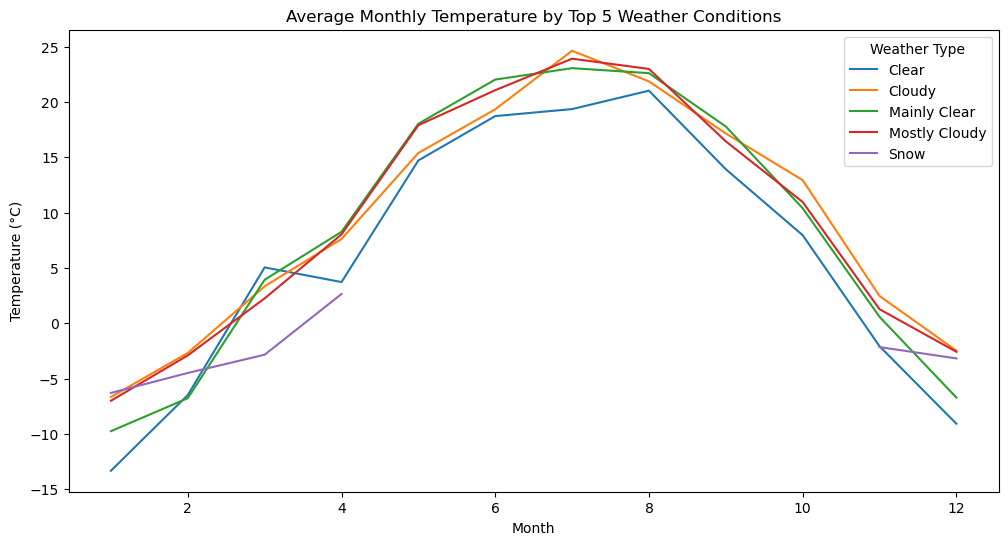

In [ ]:
# Selecting the top 5 most common weather conditions
top_5_weather = df['Weather'].value_counts().nlargest(5).index

# Filtering dataset for only these top 5 weather types
df_top5 = df[df['Weather'].isin(top_5_weather)]

# Group by Month and Weather for temperature analysis
df_top5.groupby(['Month', 'Weather'])['Temp_C'].mean().unstack().plot(figsize=(12,6))

plt.title("Average Monthly Temperature by Top 5 Weather Conditions")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend(title="Weather Type")
plt.show()


### `Interpretation:`
- Helps understand how weather change month to month

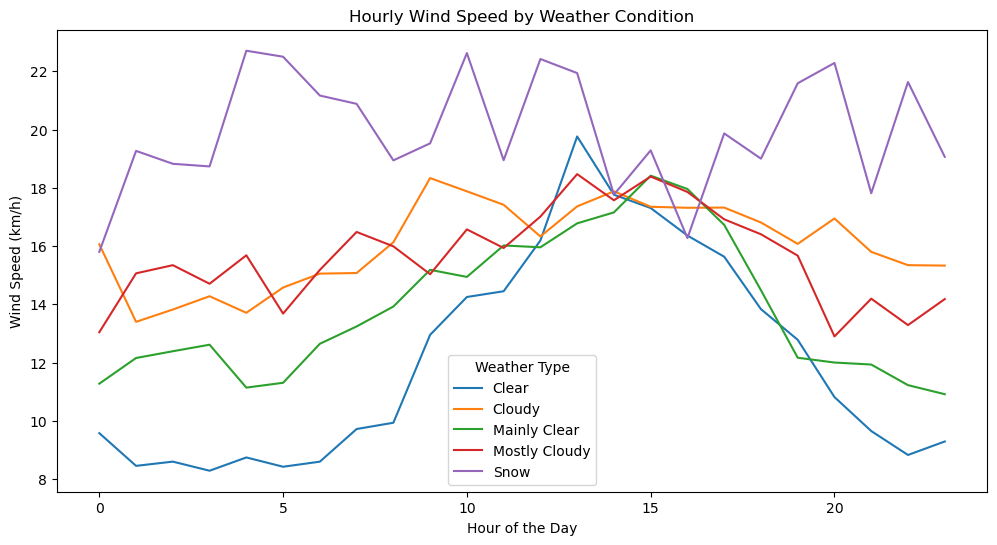

In [28]:
df_top5.groupby(['Hour', 'Weather'])['Wind Speed_km/h'].mean().unstack().plot(figsize=(12,6))
plt.title("Hourly Wind Speed by Weather Condition")
plt.xlabel("Hour of the Day")
plt.ylabel("Wind Speed (km/h)")
plt.legend(title="Weather Type")
plt.show()

### `Inference:`
- snowy weather has the highest windspeed

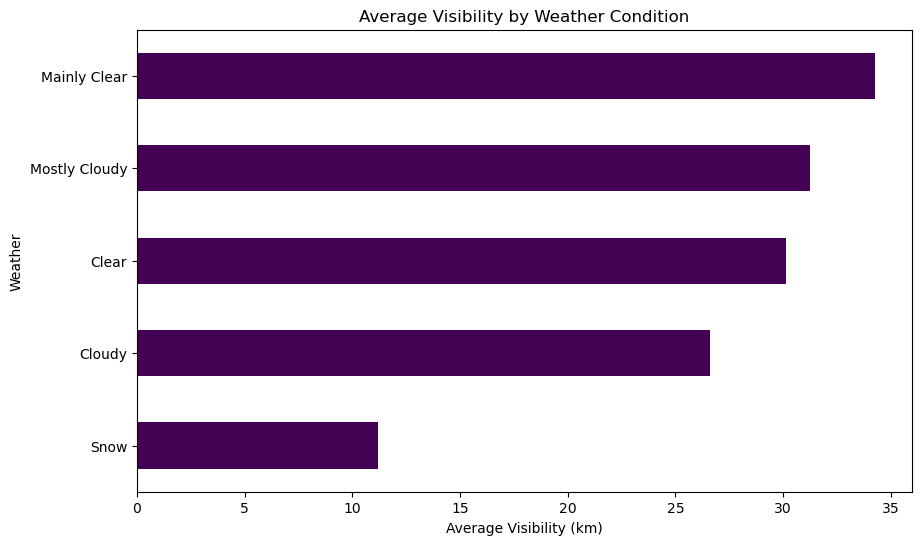

In [42]:
df_top5.groupby('Weather')['Visibility_km'].mean().sort_values().plot(kind='barh', figsize=(10,6), colormap='viridis')
plt.title("Average Visibility by Weather Condition")
plt.xlabel("Average Visibility (km)")
plt.show()


### `Inference:`
- snowy weather has the lowest visibility

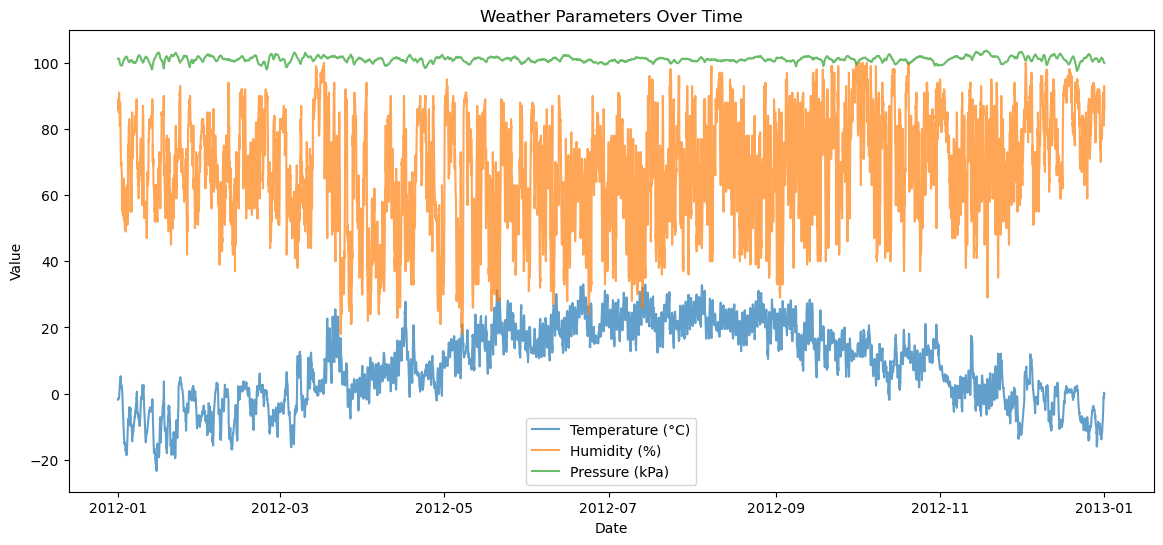

In [32]:
plt.figure(figsize=(14,6))
plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature (°C)', alpha=0.7)
plt.plot(df['Date/Time'], df['Rel Hum_%'], label='Humidity (%)', alpha=0.7)
plt.plot(df['Date/Time'], df['Press_kPa'], label='Pressure (kPa)', alpha=0.7)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Weather Parameters Over Time")
plt.show()


### `Inference:`
- shows how weather parameters have changed over time
- helps identifying seasonal patterns

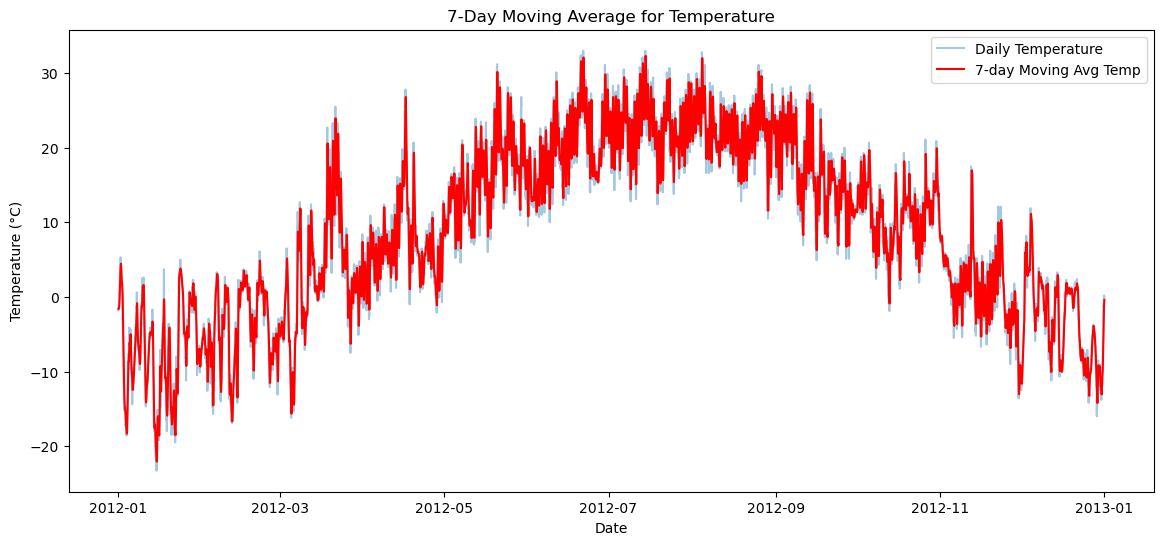

In [34]:
df['Temp_MA7'] = df['Temp_C'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Date/Time'], df['Temp_C'], alpha=0.4, label="Daily Temperature")
plt.plot(df['Date/Time'], df['Temp_MA7'], label="7-day Moving Avg Temp", color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("7-Day Moving Average for Temperature")
plt.show()


### `Interpretation:`
- Helps smooth out short-term fluctuations and highlight long-term trends.

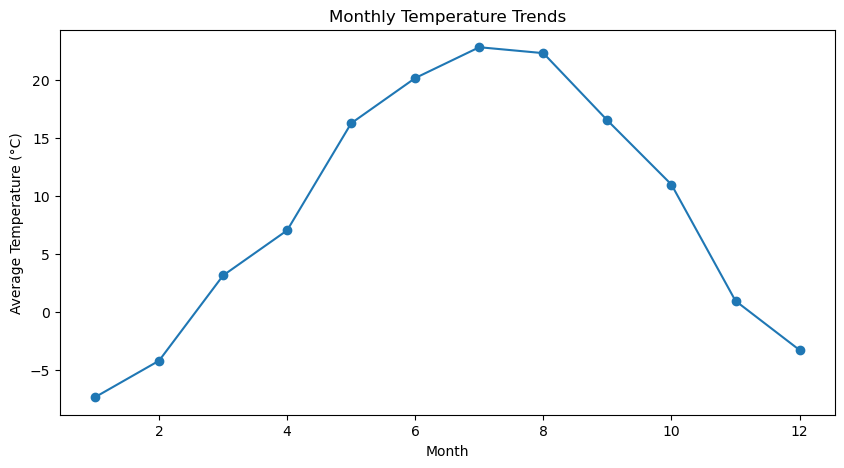

In [36]:
df.groupby('Month')['Temp_C'].mean().plot(kind='line', marker='o', figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Monthly Temperature Trends")
plt.show()


### `Inference:`
- In the month of june july august the temperature reaches maximum

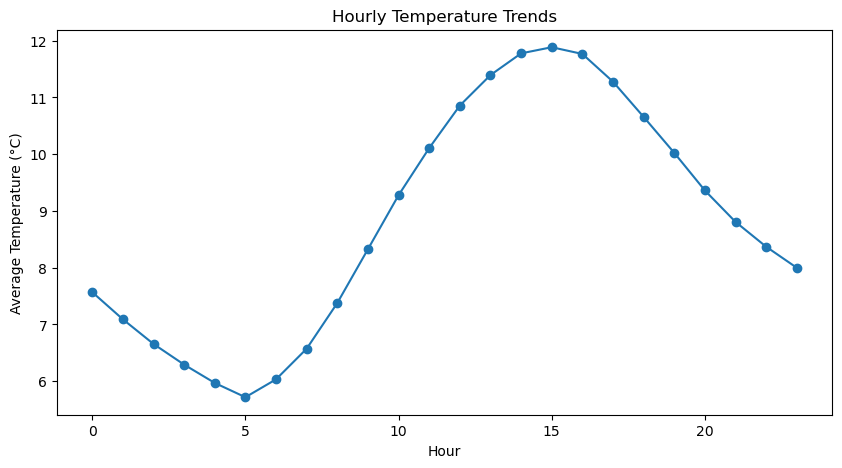

In [37]:
df.groupby('Hour')['Temp_C'].mean().plot(kind='line', marker='o', figsize=(10,5))
plt.xlabel("Hour")
plt.ylabel("Average Temperature (°C)")
plt.title("Hourly Temperature Trends")
plt.show()


### `Inference:`
- Shows how the average temperature changes in a day

C:\Users\TUFAN\AppData\Local\Temp\ipykernel_6572\165339793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Temp_C', data=df, palette="coolwarm")


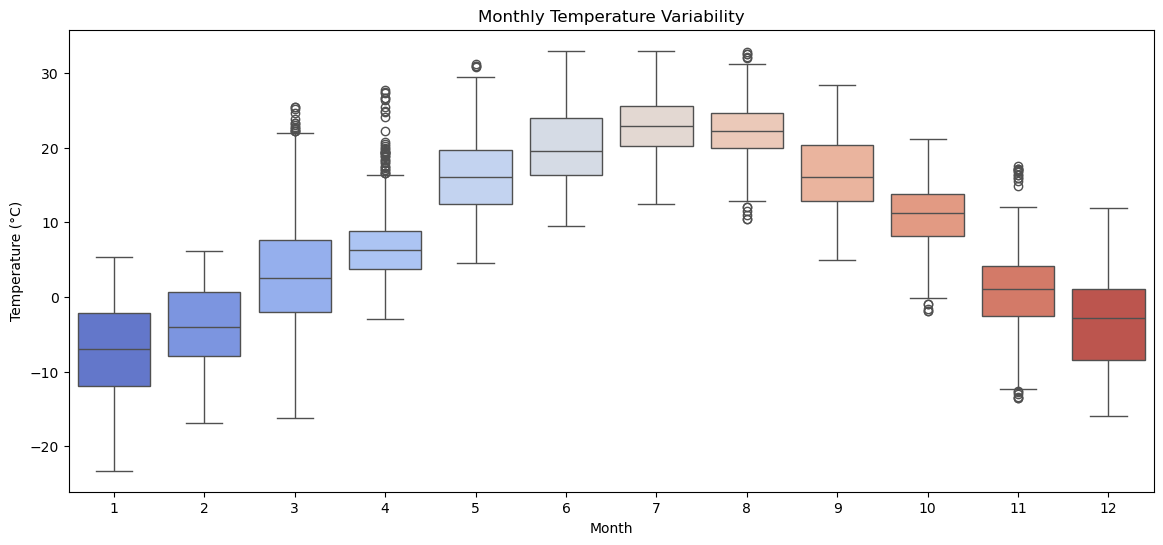

In [39]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Month', y='Temp_C', data=df, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Variability")
plt.show()


### `Inference:`
- Shows temperature variations within each month

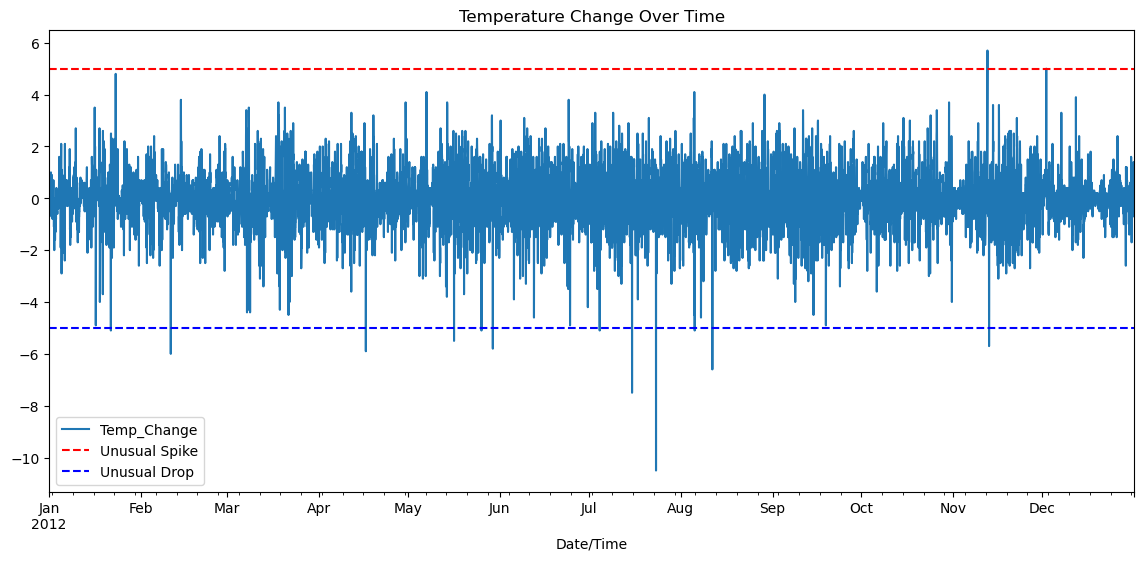

In [ ]:
df['Temp_Change'] = df['Temp_C'].diff() # Calculate the change in temperature from the previous row
df['Temp_Change'].plot(figsize=(14,6), title="Temperature Change Over Time")
plt.axhline(y=5, color='r', linestyle='--', label='Unusual Spike')
plt.axhline(y=-5, color='b', linestyle='--', label='Unusual Drop')
plt.legend()
plt.show()


### `Inference:`
- In the month of july and august there is huge temperature fluctuations